# Running inference on the Hierarchical Dirichlet-Hawkes process 

In this notebook, we will use run the inference algorithm on data that we first generate from the HDHP.

In [1]:
%matplotlib inline
import datetime
import string
import hdhp
import notebook_helpers
import seaborn as sns

aa


In [2]:
vocabulary = ['word' + str(i) for i in range(100)]  # the `words` of our documents
doc_min_length = 5
doc_length = 10
words_per_pattern = 50

alpha_0 = (2.5, 0.75)
mu_0 = (2, 0.5)
omega = 3.5

num_patterns = 10

process = hdhp.HDHProcess(num_patterns=num_patterns, alpha_0=alpha_0,
                          mu_0=mu_0, vocabulary=vocabulary,
                          omega=omega, words_per_pattern=words_per_pattern,
                          random_state=12)

[1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 2.0, 2.0, 2.0, 2.0, 1e-05, 2.0, 1e-05, 2.0, 2.0, 2.0, 2.0, 1e-05, 2.0, 2.0, 2.0, 1e-05, 2.0, 2.0, 1e-05, 2.0, 1e-05, 2.0, 2.0, 1e-05, 2.0, 1e-05, 1e-05, 1e-05, 1e-05, 2.0, 1e-05, 2.0, 2.0, 2.0, 2.0, 2.0, 1e-05, 1e-05, 1e-05, 2.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 2.0, 2.0, 1e-05, 1e-05, 2.0, 1e-05, 1e-05, 2.0, 1e-05, 1e-05, 1e-05, 1e-05, 2.0, 1e-05, 1e-05, 2.0, 1e-05, 2.0, 2.0, 2.0, 1e-05, 1e-05, 1e-05, 1e-05, 2.0, 2.0, 1e-05, 1e-05, 1e-05, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1e-05, 1e-05, 2.0, 2.0, 2.0, 2.0, 2.0, 1e-05, 2.0, 2.0, 2.0]
[1e-05, 2.0, 2.0, 1e-05, 1e-05, 2.0, 1e-05, 2.0, 2.0, 2.0, 1e-05, 2.0, 2.0, 2.0, 2.0, 1e-05, 1e-05, 1e-05, 2.0, 1e-05, 1e-05, 2.0, 1e-05, 2.0, 2.0, 2.0, 1e-05, 2.0, 1e-05, 2.0, 1e-05, 2.0, 2.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 2.0, 2.0, 1e-05, 1e-05, 1e-05, 2.0, 1e-05, 2.0, 1e-05, 1e-05, 1e-05, 2.0, 1e-05, 2.0, 1e-05, 2.0, 1e-05, 2.0, 2.0, 1e-05, 2.0, 2.0, 1e-05, 2.0, 1e-05, 2.0, 

In [4]:
process.reset()  # removes any previously generated data
for i in range(10):
    _= process.sample_user_events(min_num_events=100, 
                                  max_num_events=5000,
                                  t_max=365)
print ('Total #events', len(process.events))

Total #events 11304


We can show the annotated events that belong to pattern 1 which happened before `t=50`. This will include information about the timestamp of the event, the pattern that it belongs to, the task that it belongs to, the user who generated the event and its content.

In [6]:
print (process.show_annotated_events(patterns=[1], T_max=50))

 35.4 pattern=  1 task= 21 (u=0)  word7 word8 word9 word11 word11 word12 word13 word23 word23 word24 word24 word31 word41 word65
 1.29 pattern=  1 task=  1 (u=1)  word9 word11 word12 word27 word31 word31 word41 word41 word53 word53 word53 word73 word81
 4.31 pattern=  1 task=  2 (u=1)  word11 word12 word14 word27 word31 word31 word40 word41 word47 word63 word67 word96
 10.2 pattern=  1 task=  4 (u=1)  word27 word31 word65 word67 word81 word97
 27.7 pattern=  1 task=  6 (u=1)  word8 word18 word27 word27 word40 word41 word41 word69
   30 pattern=  1 task=  7 (u=2)  word7 word9 word11 word11 word11 word14 word24 word31 word41 word47 word53 word55 word57 word65 word65 word73 word81 word93 word97
 27.5 pattern=  1 task= 38 (u=3)  word9 word12 word12 word55 word57 word57 word65 word86 word88 word88 word90 word97
 27.5 pattern=  1 task= 38 (u=3)  word9 word9 word25 word40 word65 word70 word86 word90 word97
 39.3 pattern=  1 task= 51 (u=3)  word9 word27 word60 word65 word67 word73 word81 word8

We can also show the content distribution for the generated patterns. Below, we pick the first pattern to demonstrate this capability.

In [7]:
print (process.show_pattern_content(patterns=[1], detail_threshold=100))

___Pattern 1___ 
word41 : 116
word53 word31 word96 word47 word90 word67 word65 word88 word73 word60 word9 word11 word27 word13 word24 word86 word94 word25 word23 word70 word40 word97 word51 word12 word18 word55 word8 word93 word81 word74 word57 word7 word69 word63 word5 word2 word92 word98 word82 word58 word45 word14 word89 word29 word21 word87 word61 word1 word32


# Running inference 

In order to infer the model on a given dataset, we need to run the SMC particle filtering algorithm. We need to pick our priors for the time kernel parameter and the activity rate parameter, as well as the time decay parameter. Finally, we need to pick a number of particles that we want to use to explore the space.

Calling the `infer` function will generate a temporary log file, which stores information about the runtime of the model inference. The function returns a particle (sampled according to its likelihood) and a list of floats that report how detegenerate were our particles at each resampling round.

In [8]:
particle, norms = hdhp.infer(process.events, alpha_0=alpha_0, mu_0=mu_0,
                             omega=omega, num_particles=10, seed=512)

Created temporary log file F:\www 2019\hdhp.py-master\hdhp.py-master\examples\tmpjtg9vi4n.log


For the moment, the above process is single threaded, but it can also be parallelized.

We can now export the particle to a process object, and use it to explore the inferred data. For example, we can print the inferred content distributions, or we can plot the user timelines.

[10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 10.0, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05]
[1e-05, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 10.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-0

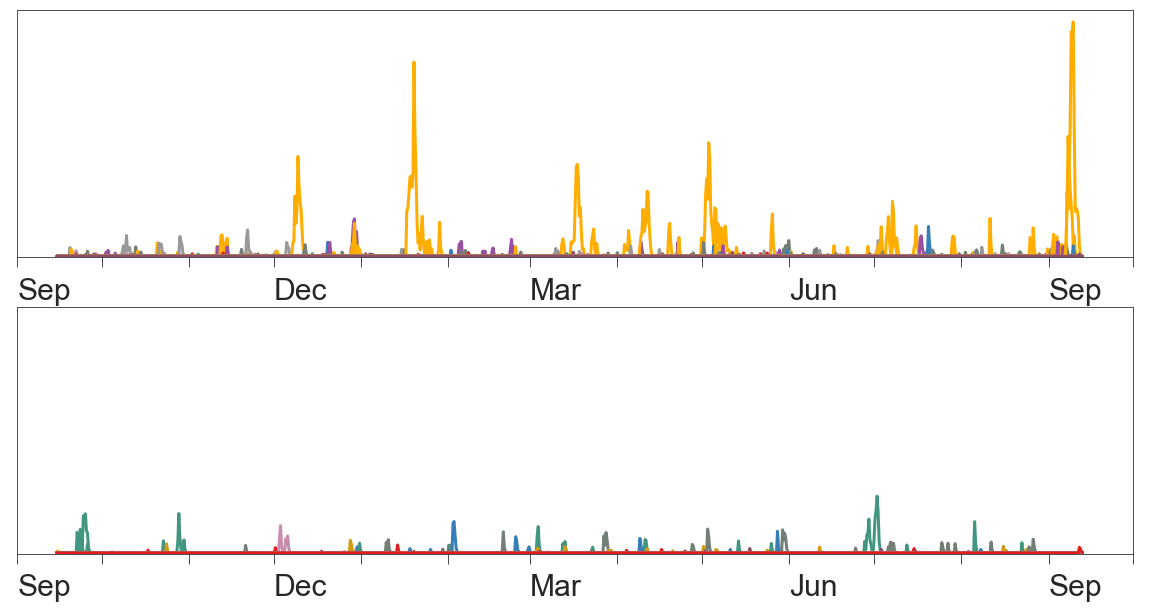

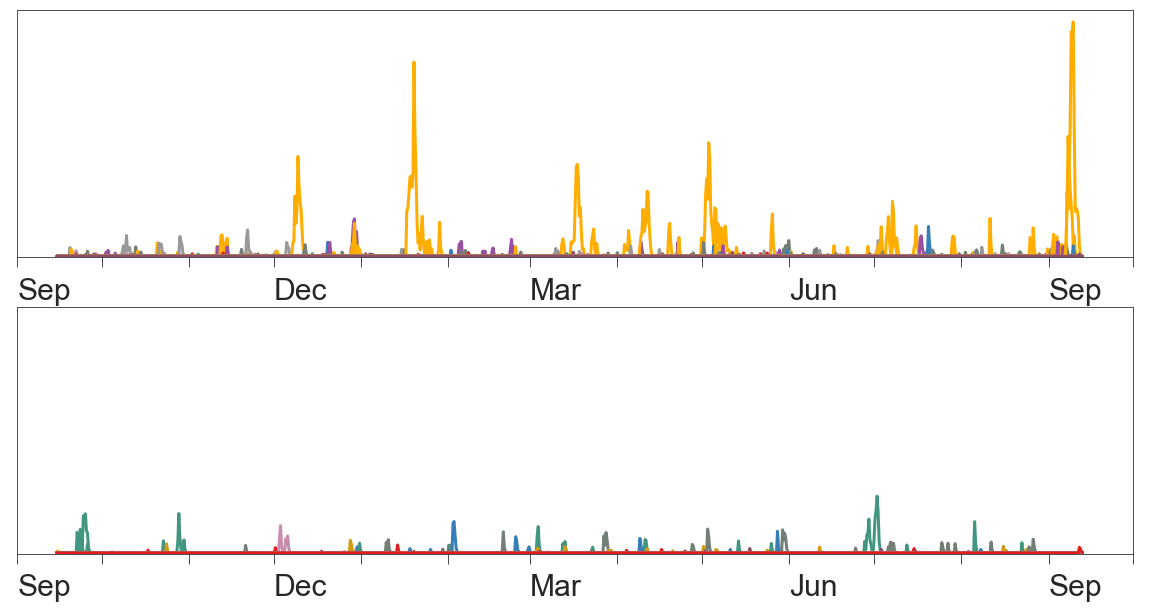

In [10]:
start_date = datetime.datetime(2015, 9, 15)

# Export the inferred process
inf_process = particle.to_process()

inf_process.plot(task_detail=True, num_samples=1000, seed=170,
                 user_limit=2, time_unit='days', 
                 T_min=0, start_date=start_date, paper=True)